In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

mnist = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

/Users/I569354/Desktop/Praxisarbeiten/Studienarbeit_Sammlung/MedicaldeepLearning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


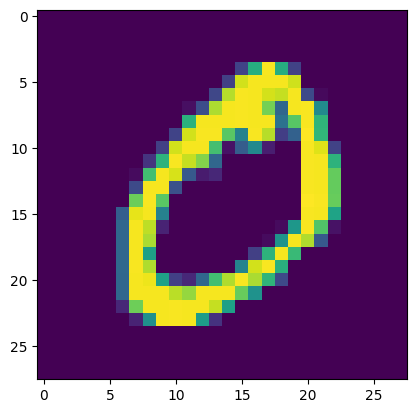

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [13]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

/Users/I569354/Desktop/Praxisarbeiten/Studienarbeit_Sammlung/MedicaldeepLearning/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8541 - loss: 0.4975 - val_accuracy: 0.9507 - val_loss: 0.1602
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9615 - loss: 0.1266 - val_accuracy: 0.9650 - val_loss: 0.1140
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0.0815 - val_accuracy: 0.9698 - val_loss: 0.1041
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9818 - loss: 0.0599 - val_accuracy: 0.9718 - val_loss: 0.0972
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.9729 - val_loss: 0.0950
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9883 - loss: 0.0363 - val_accuracy: 0.9748 - val_loss: 0.0943
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.9731 - val_loss: 0.1002
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0249 - 

In [18]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


0.9787

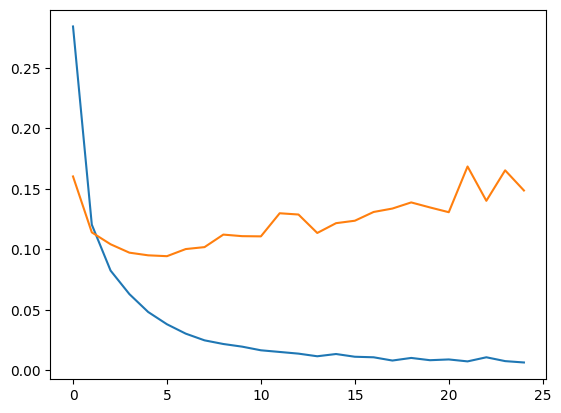

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

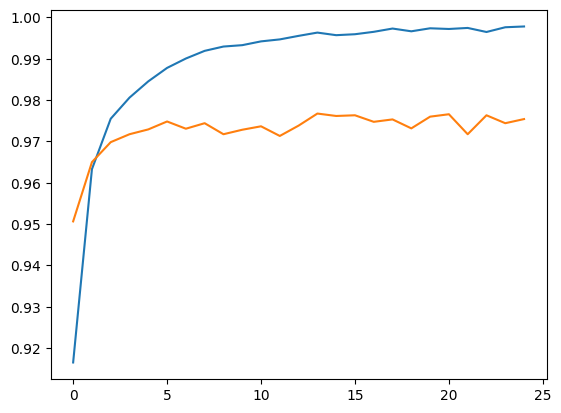

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [24]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


array([[1.53762894e-13, 6.15513716e-12, 3.86081683e-13, ...,
        7.21466401e-16, 1.54369125e-13, 2.59144693e-24],
       [1.33974142e-15, 1.01712378e-12, 1.00000000e+00, ...,
        5.36690299e-17, 2.60644760e-31, 3.16545133e-27],
       [1.34846275e-11, 9.99997735e-01, 3.85415376e-07, ...,
        1.11273287e-07, 2.63675719e-13, 1.12076113e-14],
       ...,
       [1.26883659e-33, 7.51280671e-30, 3.05302655e-25, ...,
        3.91435659e-22, 1.09724777e-13, 2.65291529e-36],
       [2.27024970e-21, 1.52917309e-25, 5.24378310e-23, ...,
        7.59418163e-14, 8.10311882e-26, 3.52066083e-36],
       [4.65239412e-19, 7.72093451e-27, 2.36869292e-24, ...,
        6.04533642e-20, 7.36816911e-23, 1.27863204e-33]], dtype=float32)

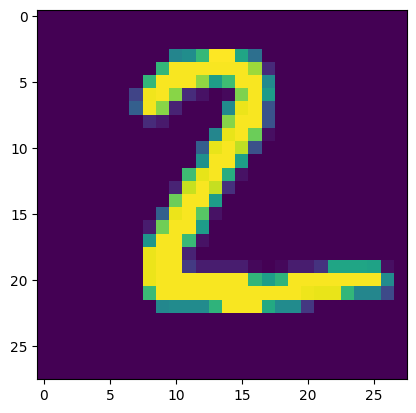

In [28]:
plt.imshow(X_test[1])